## TASK 4
Arshpreet Kandola
October 5 2023
https://github.com/akandola47/datafun-07-ml-predictive

## PART 1 - LINEAR REGRESSION

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from scipy import stats

In [24]:
c= lambda f: 5/9*(f-32)

temps=[(f,c(f)) for f in range (0,101,10)]

In [25]:
import pandas as pd

In [26]:
temps_df= pd.DataFrame(temps, columns=['Fahrenheit', ' Celsius'])
axes= temps_df.plot(x='Fahrenheit', y='Celsius', style = '.-')
y_label = axes.set_ylabel('Celsius')



KeyError: 'Celsius'

In [27]:
nyc=pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

## Section 2- View

In [28]:
nyc.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [29]:
nyc.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


## Section 3- Clean

In [30]:
nyc.columns= ['Date','Temperature','Anomaly']

nyc.head()

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [31]:
nyc.Date.dtype

dtype('int64')

In [32]:
nyc.Date=nyc.Date.floordiv(100)

nyc.head()

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9
3,1898,39.6,2.2
4,1899,36.4,-1.0


## Section 4- Describe

In [33]:
pd.set_option('display.precision',2)

nyc.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

## Section 5- Calculate Line

In [34]:
from scipy import stats

linear_regression = stats.linregress( x=nyc.Date, y=nyc.Temperature)

In [35]:
linear_regression.slope

0.01477136113296616

In [36]:
linear_regression.intercept

8.694993233674293

## Section 6- Predict

In [37]:
linear_regression.slope * 2026 + linear_regression.intercept

38.62177088906374

In [38]:
linear_regression.slope * 1890 + linear_regression.intercept

36.612865774980335

## Section 7- Plot 

(10.0, 70.0)

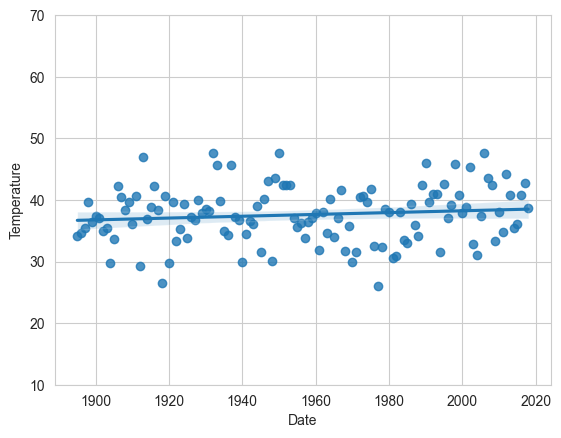

In [40]:
import seaborn as sns

sns.set_style('whitegrid')

axes = sns.regplot(x=nyc.Date, y = nyc.Temperature)

axes.set_ylim(10,70)

## Part 2 MACHINE LEARNING

## SECTION 1 

In [41]:
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


## SECTION 2

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(nyc.Date.values.reshape(-1,1),nyc.Temperature.values,random_state=11) 

In [48]:
X_train.shape

(93, 1)

In [49]:
X_test.shape

(31, 1)

## Section 3 

In [52]:
from sklearn.linear_model import LinearRegression

linear_regression=LinearRegression()

linear_regression.fit( X=X_train, y=y_train)



LinearRegression()

In [53]:
linear_regression.coef_

array([0.01939167])

In [54]:
linear_regression.intercept_

-0.30779820252656265

## Section 4 

In [55]:
predicted = linear_regression.predict(X_test)

expected= y_test

for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p: .2f},expected: {e:.2f}')

predicted:  37.86,expected: 31.70
predicted:  38.69,expected: 34.80
predicted:  37.00,expected: 39.40
predicted:  37.25,expected: 45.70
predicted:  38.05,expected: 32.30
predicted:  37.64,expected: 33.80
predicted:  36.94,expected: 39.70


## Section 5 

In [56]:
predict= (lambda x: linear_regression.coef_ *x + linear_regression.intercept_)

predict(2026)

array([38.97973189])

In [57]:
predict(1890)

array([36.34246432])

## Section 6

(10.0, 70.0)

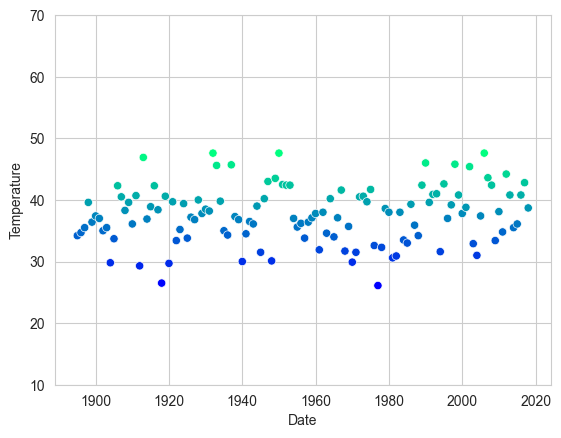

In [59]:
import seaborn as sns

axes=sns.scatterplot(data= nyc,x='Date', y= 'Temperature', hue= 'Temperature', palette='winter', legend=False)

axes.set_ylim(10,70)

AttributeError: 'Series' object has no attribute 'value'

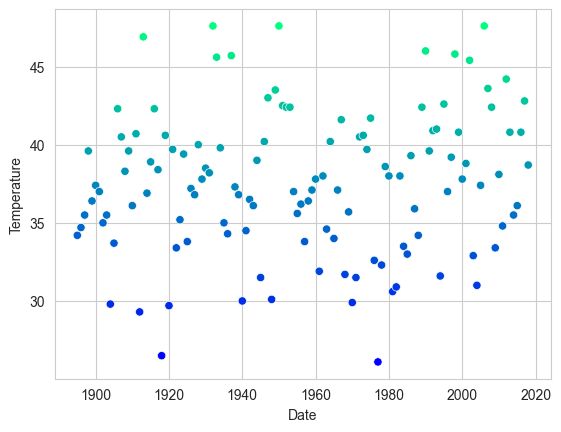

In [72]:
axes=sns.scatterplot(data= nyc,x='Date', y= 'Temperature', hue= 'Temperature', palette='winter', legend=False)
import numpy as np
x=np.array([min(nyc.Date.values), max(nyc.Date.value)])
y=predict(x)
import matplotlib.pyplot as plt
line=plt.plot(x,y)